In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation

In [87]:
df = pd.read_csv("Bank.csv", )
df.info()#有沒有空值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [88]:
#標準化
X = ['age','balance','duration','campaign','previous']
scaler = StandardScaler().fit(df[X])
X_std = scaler.transform(df[X])
df_std = pd.DataFrame(X_std, columns=X)
df_std.describe()

,age,balance,duration,campaign,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,5.222844e-16,3.070663e-15,5.560938e-17,1.254699e-14,1.355210e-13
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00,-1.002478e+00,-5.693506e-01,-2.519404e-01
25%,-7.473845e-01,-4.237719e-01,-6.025167e-01,-5.693506e-01,-2.519404e-01
50%,-1.823406e-01,-3.002800e-01,-3.035165e-01,-2.465603e-01,-2.519404e-01
75%,6.652252e-01,2.158743e-02,2.362370e-01,7.622994e-02,-2.519404e-01
max,5.091402e+00,3.309478e+01,1.809470e+01,1.944365e+01,1.191360e+02


k =  2 inertia = 193908.405446  Silhouette Coefficiency Average = 0.248088


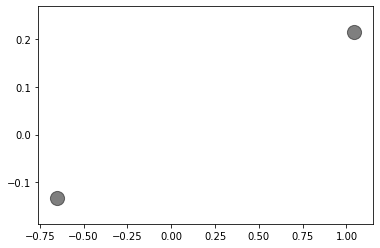

k =  3 inertia = 168424.022144  Silhouette Coefficiency Average = 0.268585


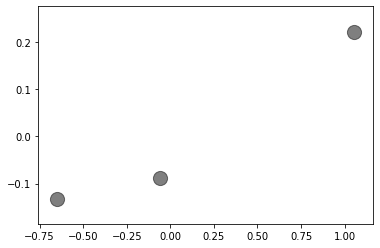

k =  4 inertia = 144421.823596  Silhouette Coefficiency Average = 0.294187


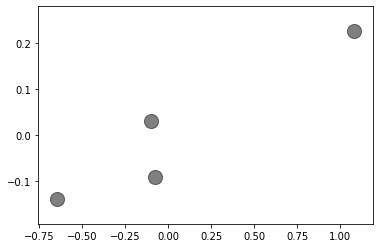

k =  5 inertia = 123117.977447  Silhouette Coefficiency Average = 0.302772


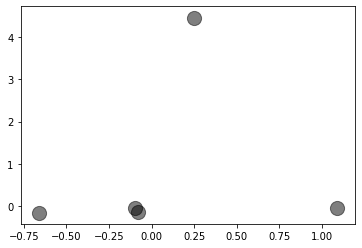

k =  6 inertia = 106218.916834  Silhouette Coefficiency Average = 0.318066


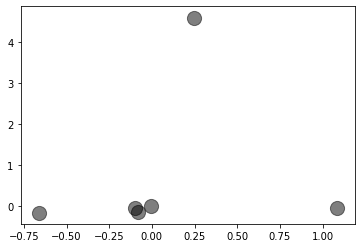

k =  7 inertia = 92897.165248  Silhouette Coefficiency Average = 0.319660


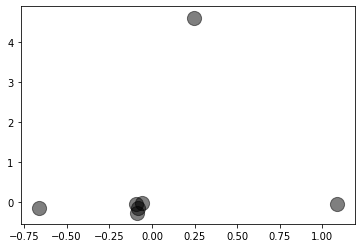

k =  8 inertia = 85263.809637  Silhouette Coefficiency Average = 0.324222


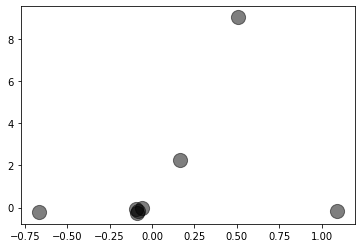

k =  9 inertia = 79539.300340  Silhouette Coefficiency Average = 0.289607


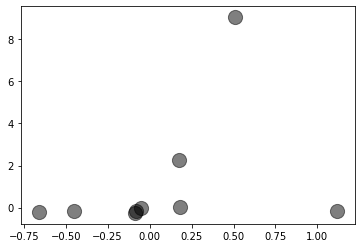

In [89]:
#確認到底能分幾群會比較好
inertia_pic = []
silhouette_pic = []

for k in range(2, 10):
    kmeansModel = KMeans(n_clusters=k, random_state=100)
    clustersPred = kmeansModel.fit(df_std)
    inertia = kmeansModel.inertia_
    centers = kmeansModel.cluster_centers_
    silhouetteAvg = silhouette_score(df_std, clustersPred.labels_)
    inertia_pic.append(inertia)
    silhouette_pic.append(silhouetteAvg)
    print("k = {:2d} inertia = {:.6f}  Silhouette Coefficiency Average = {:.6f}".format(k, inertia, silhouetteAvg))
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

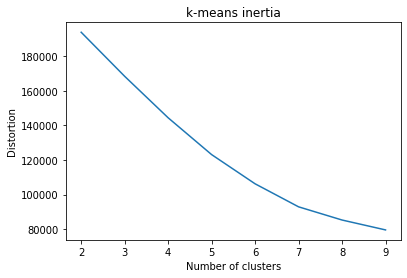

In [91]:
plt.plot(range(2, 10), inertia_pic)
plt.title("k-means inertia")
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

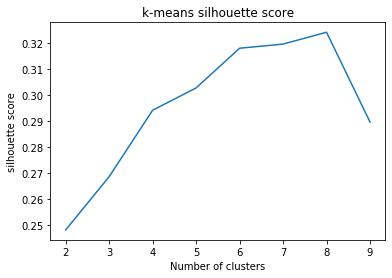

In [92]:
plt.plot(range(2, 10), silhouette_pic)
plt.title("k-means silhouette score")
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')
plt.show()

In [33]:
#k-mean
KM = df_std
kmeansModel = KMeans(n_clusters=8,init = 'random')
KM['pred'] = kmeansModel.fit_predict(df_std)
KM8centers = kmeansModel.cluster_centers_

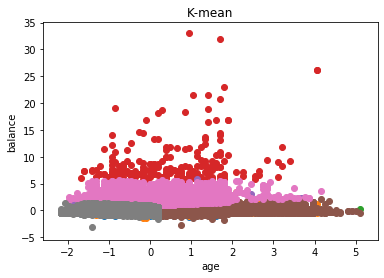

In [93]:
#散佈圖
for i in range(8):
    plt.scatter(KM.loc[KM['pred']==i, ["age"]], 
          KM.loc[KM['pred']==i, ["balance"]])

plt.xlabel("age")
plt.ylabel("balance")
plt.title("K-mean")
plt.show()

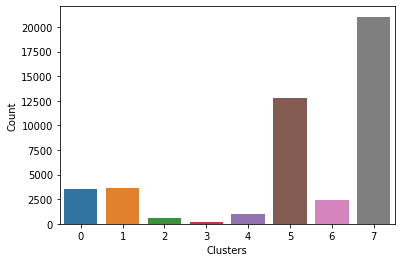

In [41]:
#每一群有幾個點
sns.countplot(x="pred",data=KM, order=range(8))

plt.xlabel("Clusters")
plt.ylabel("Count")
plt.title("K-mean")
plt.show()

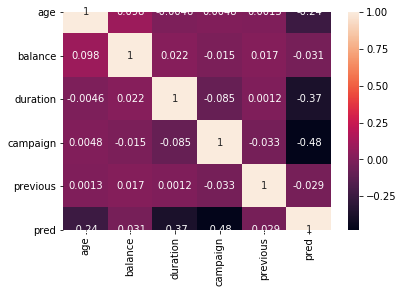

In [42]:
#熱點圖
sns.heatmap(KM.corr(),  annot=True)
plt.show()

In [59]:
#訓練ward linkage，資料太大取1500筆
df_std1500 = df_std.sample(n=1500)
wardModel = hierarchy.linkage(df_std1500, 'ward')

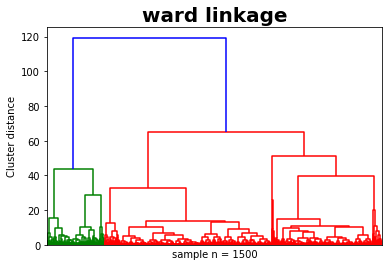

In [61]:
#畫樹狀圖
hierarchy.dendrogram(wardModel, orientation="top", labels=df_std1500.index, no_labels=True)

plt.xlabel("sample n = 1500")
plt.ylabel('Cluster distance')
plt.title('ward linkage')
plt.show()

In [65]:
# 以距離分群
max_dis = 40
df_std1500['wardPred'] = hierarchy.fcluster(wardModel,max_dis,criterion='distance')

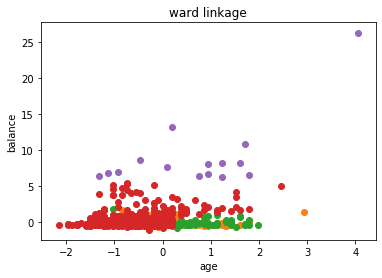

In [94]:
#散佈圖
for i in range(5):
    plt.scatter(df_std1500.loc[df_std1500['wardPred']==i, ["age"]], 
          df_std1500.loc[df_std1500['wardPred']==i, ["balance"]])

plt.xlabel("age")
plt.ylabel("balance")
plt.title('ward linkage')
plt.show()

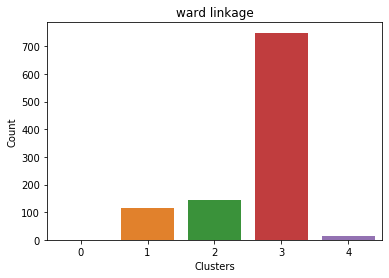

In [95]:
#每一群有幾個點
sns.countplot(x="wardPred",data=df_std1500, order=range(5))

plt.xlabel("Clusters")
plt.ylabel("Count")
plt.title('ward linkage')
plt.show()

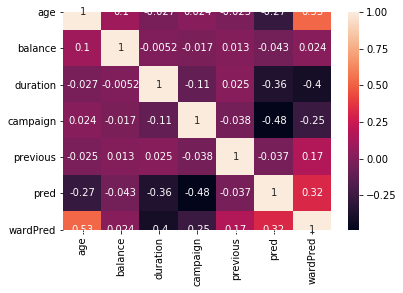

In [70]:
#熱點圖
sns.heatmap(df_std1500.corr(),  annot=True)
plt.show()

In [73]:
#DBSCAN分類
DBSCAN_X = df_std1500[df_std.columns]
dbsModel = DBSCAN(eps=0.3, min_samples=10).fit(DBSCAN_X)
df_std1500['dbsPred'] = dbsModel.labels_
print(df_std1500['dbsPred'].astype('category').value_counts())

-1    1053
 0     150
 3     114
 2      76
 1      59
 4      36
 5      12
Name: dbsPred, dtype: int64


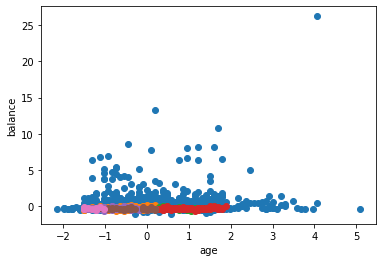

In [74]:
#散佈圖
for i in range(-1,6):
    plt.scatter(df_std1500.loc[df_std1500['dbsPred']==i, ["age"]], 
          df_std1500.loc[df_std1500['dbsPred']==i, ["balance"]])

plt.xlabel("age")
plt.ylabel("balance")
plt.title('DBSCAN')
plt.show()

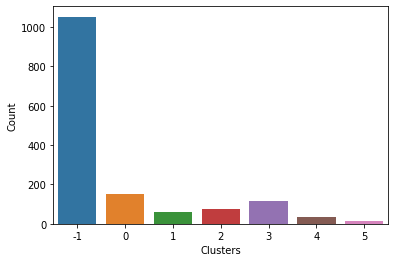

In [75]:
#每一群有幾個點
sns.countplot(x="dbsPred",data=df_std1500, order=range(-1,6))

plt.xlabel("Clusters")
plt.ylabel("Count")
plt.title('DBSCAN')
plt.show()

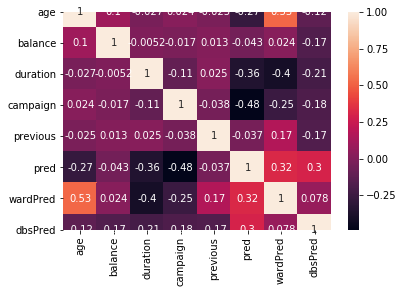

In [76]:
#熱點圖
sns.heatmap(df_std1500.corr(),  annot=True)
plt.show()

In [79]:
#鄰近傳播分類
aff_X = df_std1500[df_std.columns]
affModel = AffinityPropagation()
df_std1500['affPred'] = affModel.fit_predict(aff_X)
print("centers n = ", len(df_std1500['affPred'].astype('category').value_counts()), "\n")
print(df_std1500['affPred'].astype('category').value_counts()[0:8])

centers n =  61 

58    95
39    84
52    77
8     68
21    67
23    67
25    67
43    60
Name: affPred, dtype: int64


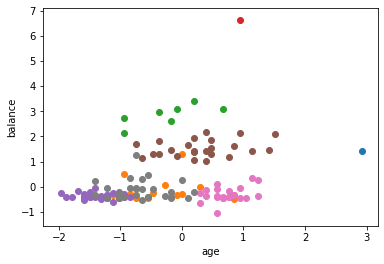

In [80]:
#散佈圖，只列出前8群
for i in range(8):
    plt.scatter(df_std1500.loc[df_std1500['affPred']==i, ["age"]], 
          df_std1500.loc[df_std1500['affPred']==i, ["balance"]])

plt.xlabel("age")
plt.ylabel("balance")
plt.title('AFF')
plt.show()

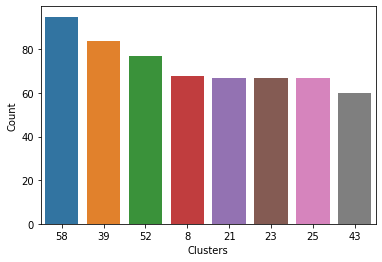

In [81]:
#每一群有幾個點
order = [58,39,52,8,21,23,25,43]
sns.countplot(x="affPred",data=df_std1500, order = order)

plt.xlabel("Clusters")
plt.ylabel("Count")
plt.title('AFF')
plt.show()

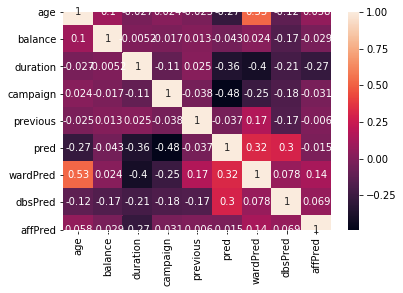

In [82]:
#熱點圖
sns.heatmap(df_std1500.corr(),  annot=True)
plt.show()